# Assignment 2.1 [Python]

## University of San Diego

## ADS 502

## Dingyi Duan


#### For Exercises 21–30, continue working with the bank_marketing_training data set. Use
#### either Python or R to solve each problem.


### 21. Produce the following graphs. What is the strength of each graph? Weakness?

#### a. Bar graph of marital.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bank_train = pd.read_csv("C:/Users/DDY/Desktop/2021-Spring-textbooks/ADS-502/Module2/Website Data Sets/bank_marketing_training.csv")
pd.set_option('display.max_columns', None)

In [2]:
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [3]:
# Use df.plot(kind = 'bar') for barplot; use value_count() for non-numeric values

<AxesSubplot:>

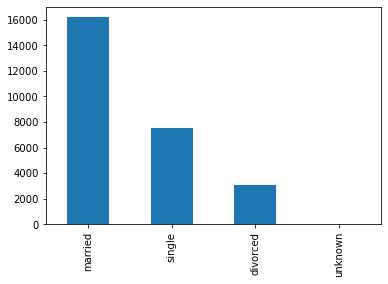

In [4]:
bank_train['marital'].value_counts().plot(kind = 'bar')

#### Strenghth: Easy to see which the number difference; 
#### Weakness: values are not normalized thus can't see the exact number of the category with minimal value

#### b. Bar graph of marital, with overlay of response.

In [5]:
# Create the contingency table first in order to create an overlaid bar chart

In [6]:
crosstab_01 = pd.crosstab(bank_train['marital'], bank_train['response'])

In [7]:
crosstab_01

response,no,yes
marital,,
divorced,2743,312
married,14579,1608
single,6514,1061
unknown,50,7


<AxesSubplot:xlabel='marital'>

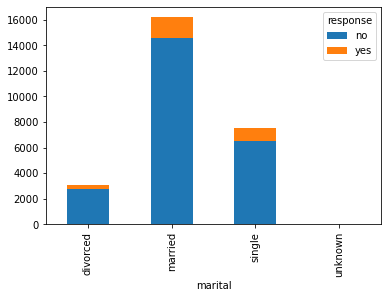

In [8]:
crosstab_01.plot(kind='bar', stacked = True)

#### Strength: can clearly see which category has more values;
#### Weakness: it is hard to tell the ratio of response of yes and no

#### c. Normalized bar graph of marital, with overlay of response.

In [9]:
# Normalize the contingency table using table.div(table.sum(axis=1),axis=0); 
# divide each value in the row by the sum of the columns

<AxesSubplot:xlabel='marital'>

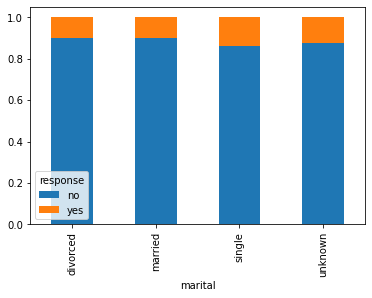

In [10]:
crosstab_01_norm = crosstab_01.div(crosstab_01.sum(axis=1), axis = 0)
crosstab_01_norm.plot(kind='bar', stacked = True)

#### Strength: can have a better understanding of the ratio of yes and no;
#### Weakness: cannot see the numeric difference between each category

### 22. Using the graph from Exercise 21c, describe the relationship between marital and response.

#### In divorced and married status, the response of "yes" rate is the same and the lowest among all;
#### For unknown status, the response of "yes" rate is in between single and divorced/married;
#### Response rate of "yes" is the highest for single marital status

### 23. Do the following with the variables marital and response.

#### a. Build a contingency table, being careful to have the correct variables representing
#### the rows and columns. Report the counts and the column percentages.

In [11]:
crosstab_02 = pd.crosstab(bank_train['response'], bank_train['marital'])

In [12]:
crosstab_02_percent_col = (round(crosstab_02.div((crosstab_02.sum(axis=0))/100,axis=1),2)).astype(str) + '%'

In [13]:
crosstab_02_percent_col

marital,divorced,married,single,unknown
response,,,,
no,89.79%,90.07%,85.99%,87.72%
yes,10.21%,9.93%,14.01%,12.28%


#### b. Describe what the contingency table is telling you.

#### For response of "no", 'married' has the most percentage;
#### For response of "yes", 'single' has the most percentage.


### 24. Repeat the previous exercise, this time reporting the row percentages. Explain the
### difference between the interpretation of this table and the previous contingency table.

In [14]:
crosstab_01_percent_row = (round(crosstab_01.div((crosstab_01.sum(axis=1))/100,axis=0),2)).astype(str) + '%'

In [15]:
crosstab_01_percent_row

response,no,yes
marital,,
divorced,89.79%,10.21%
married,90.07%,9.93%
single,85.99%,14.01%
unknown,87.72%,12.28%


#### This time the row percentage shows the ratio in each marital status of response of "yes" and "no";
#### In "divorced", 89.79% responsed "no" and 10.21% responsed "yes";
#### In "msrried", 90.07% responsed "no" and 9.93% responsed "yes";
#### In "single", 85.99% responsed "no" and 14.01% responsed "yes";
#### In "unknown", 87.72% responsed "no" and 12.38% responsed "yes";
#### Overall, more people repsonsed "no" than "yes".

#### The difference between this two tables is one is from the perspective of response while the other is 
#### from the perspective of marital status.

### 25. Produce the following graphs. What is the strength of each graph? Weakness?

#### a. Histogram of duration.

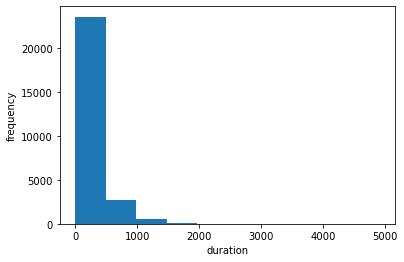

In [16]:
plt.hist(bank_train['duration'])
plt.xlabel('duration');
plt.ylabel('frequency');

#### Strength: easy to see the general range of the mode
#### Weakness: hard to get the clear idea of more detailed bin range

#### b. Histogram of duration, with overlay of response.

In [17]:
duration_y = bank_train[bank_train.response == "yes"]['duration']
duration_n = bank_train[bank_train.response == "no"]['duration']

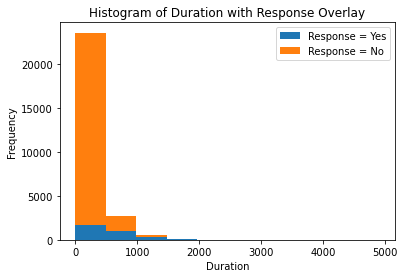

In [18]:
plt.hist([duration_y, duration_n], bins = 10,stacked = True)
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Histogram of Duration with Response Overlay')
plt.xlabel('Duration'); plt.ylabel('Frequency'); plt.show()

#### Strength: Can see frequency of duration with overlay of response with each bin (hardly)
#### Weakness: hard to tell the ratio comparison between the durations

#### c. Normalized histogram of duration, with overlay of response.

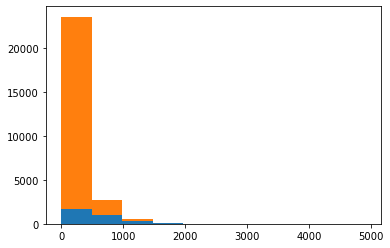

In [19]:
(n, bins, patches) = plt.hist([duration_y, duration_n], bins =
10, stacked = True)

In [20]:
n_table = np.column_stack((n[0], n[1]))

In [21]:
n_norm = n_table / n_table.sum(axis=1)[:, None]

In [22]:
ourbins = np.column_stack((bins[0:10], bins[1:11]))

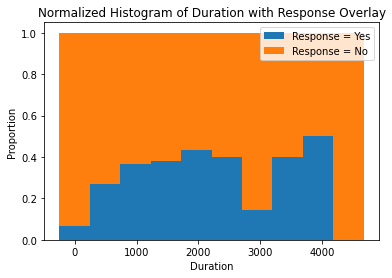

In [23]:
p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0],
width = ourbins[:, 1] - ourbins[:, 0])
p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1],
width = ourbins[:, 1] - ourbins[:, 0],
bottom = n_norm[:,0])
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Normalized Histogram of Duration with Response Overlay')
plt.xlabel('Duration'); plt.ylabel('Proportion'); plt.show()

#### Strength: Can clearly see the ratio of yes and no for each bin
#### Weakness: hard to tell the which bin contains higher frequency of duration

### For Exercises 14–20, work with the adult_ch6_training and adult_ch6_test data sets. Use either Python or R to solve each problem.

### 14. Create a CART model using the training data set that predicts income using marital status and capital  gains and losses. Visualize the decision tree (that is, provide the decision tree output). Describe the first few splits in the decision tree.

In [24]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
adult_training = pd.read_csv("C:/Users/DDY\Desktop/2021-Spring-textbooks/ADS-502/Module2/Website Data Sets/adult_ch6_training")

In [25]:
adult_training.head()

,Marital status,Income,Cap_Gains_Losses
0,Never-married,<=50K,0.02174
1,Divorced,<=50K,0.00000
2,Married,<=50K,0.00000
3,Married,<=50K,0.00000
4,Married,<=50K,0.00000


In [39]:
y = adult_training[['Income']]

In [41]:
y

,Income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
18756,<=50K
18757,<=50K
18758,<=50K
18759,<=50K


In [40]:
X = adult_training[['Marital status', 'Cap_Gains_Losses']]

In [42]:
X

,Marital status,Cap_Gains_Losses
0,Never-married,0.02174
1,Divorced,0.00000
2,Married,0.00000
3,Married,0.00000
4,Married,0.00000
...,...,...
18756,Divorced,0.00000
18757,Married,0.00000
18758,Married,0.00000
18759,Divorced,0.00000


In [43]:
marital_dummy = pd.get_dummies(X['Marital status'])

In [44]:
marital_dummy

,Divorced,Married,Never-married,Separated,Widowed
0,0,0,1,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
18756,1,0,0,0,0
18757,0,1,0,0,0
18758,0,1,0,0,0
18759,1,0,0,0,0


In [ ]:
# Concatenate by cols

In [45]:
X = pd.concat((X[['Cap_Gains_Losses']], marital_dummy), axis = 1)

In [46]:
X

,Cap_Gains_Losses,Divorced,Married,Never-married,Separated,Widowed
0,0.02174,0,0,1,0,0
1,0.00000,1,0,0,0,0
2,0.00000,0,1,0,0,0
3,0.00000,0,1,0,0,0
4,0.00000,0,1,0,0,0
...,...,...,...,...,...,...
18756,0.00000,1,0,0,0,0
18757,0.00000,0,1,0,0,0
18758,0.00000,0,1,0,0,0
18759,0.00000,1,0,0,0,0


In [47]:
DT = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5).fit(X, y)

[Text(1116.0, 951.3000000000001, 'Married <= 0.5\ngini = 0.364\nsamples = 18761\nvalue = [14271, 4490]\nclass = <=50K'),
 Text(558.0, 679.5, 'Cap_Gains_Losses <= 0.047\ngini = 0.119\nsamples = 9891\nvalue = [9260, 631]\nclass = <=50K'),
 Text(279.0, 407.70000000000005, 'gini = 0.083\nsamples = 9342\nvalue = [8938, 404]\nclass = <=50K'),
 Text(837.0, 407.70000000000005, 'Cap_Gains_Losses <= 0.293\ngini = 0.485\nsamples = 549\nvalue = [322, 227]\nclass = <=50K'),
 Text(558.0, 135.89999999999998, 'gini = 0.411\nsamples = 235\nvalue = [68, 167]\nclass = >50K'),
 Text(1116.0, 135.89999999999998, 'gini = 0.309\nsamples = 314\nvalue = [254, 60]\nclass = <=50K'),
 Text(1674.0, 679.5, 'Cap_Gains_Losses <= 0.051\ngini = 0.492\nsamples = 8870\nvalue = [5011, 3859]\nclass = <=50K'),
 Text(1395.0, 407.70000000000005, 'gini = 0.465\nsamples = 7632\nvalue = [4821, 2811]\nclass = <=50K'),
 Text(1953.0, 407.70000000000005, 'gini = 0.26\nsamples = 1238\nvalue = [190, 1048]\nclass = >50K')]

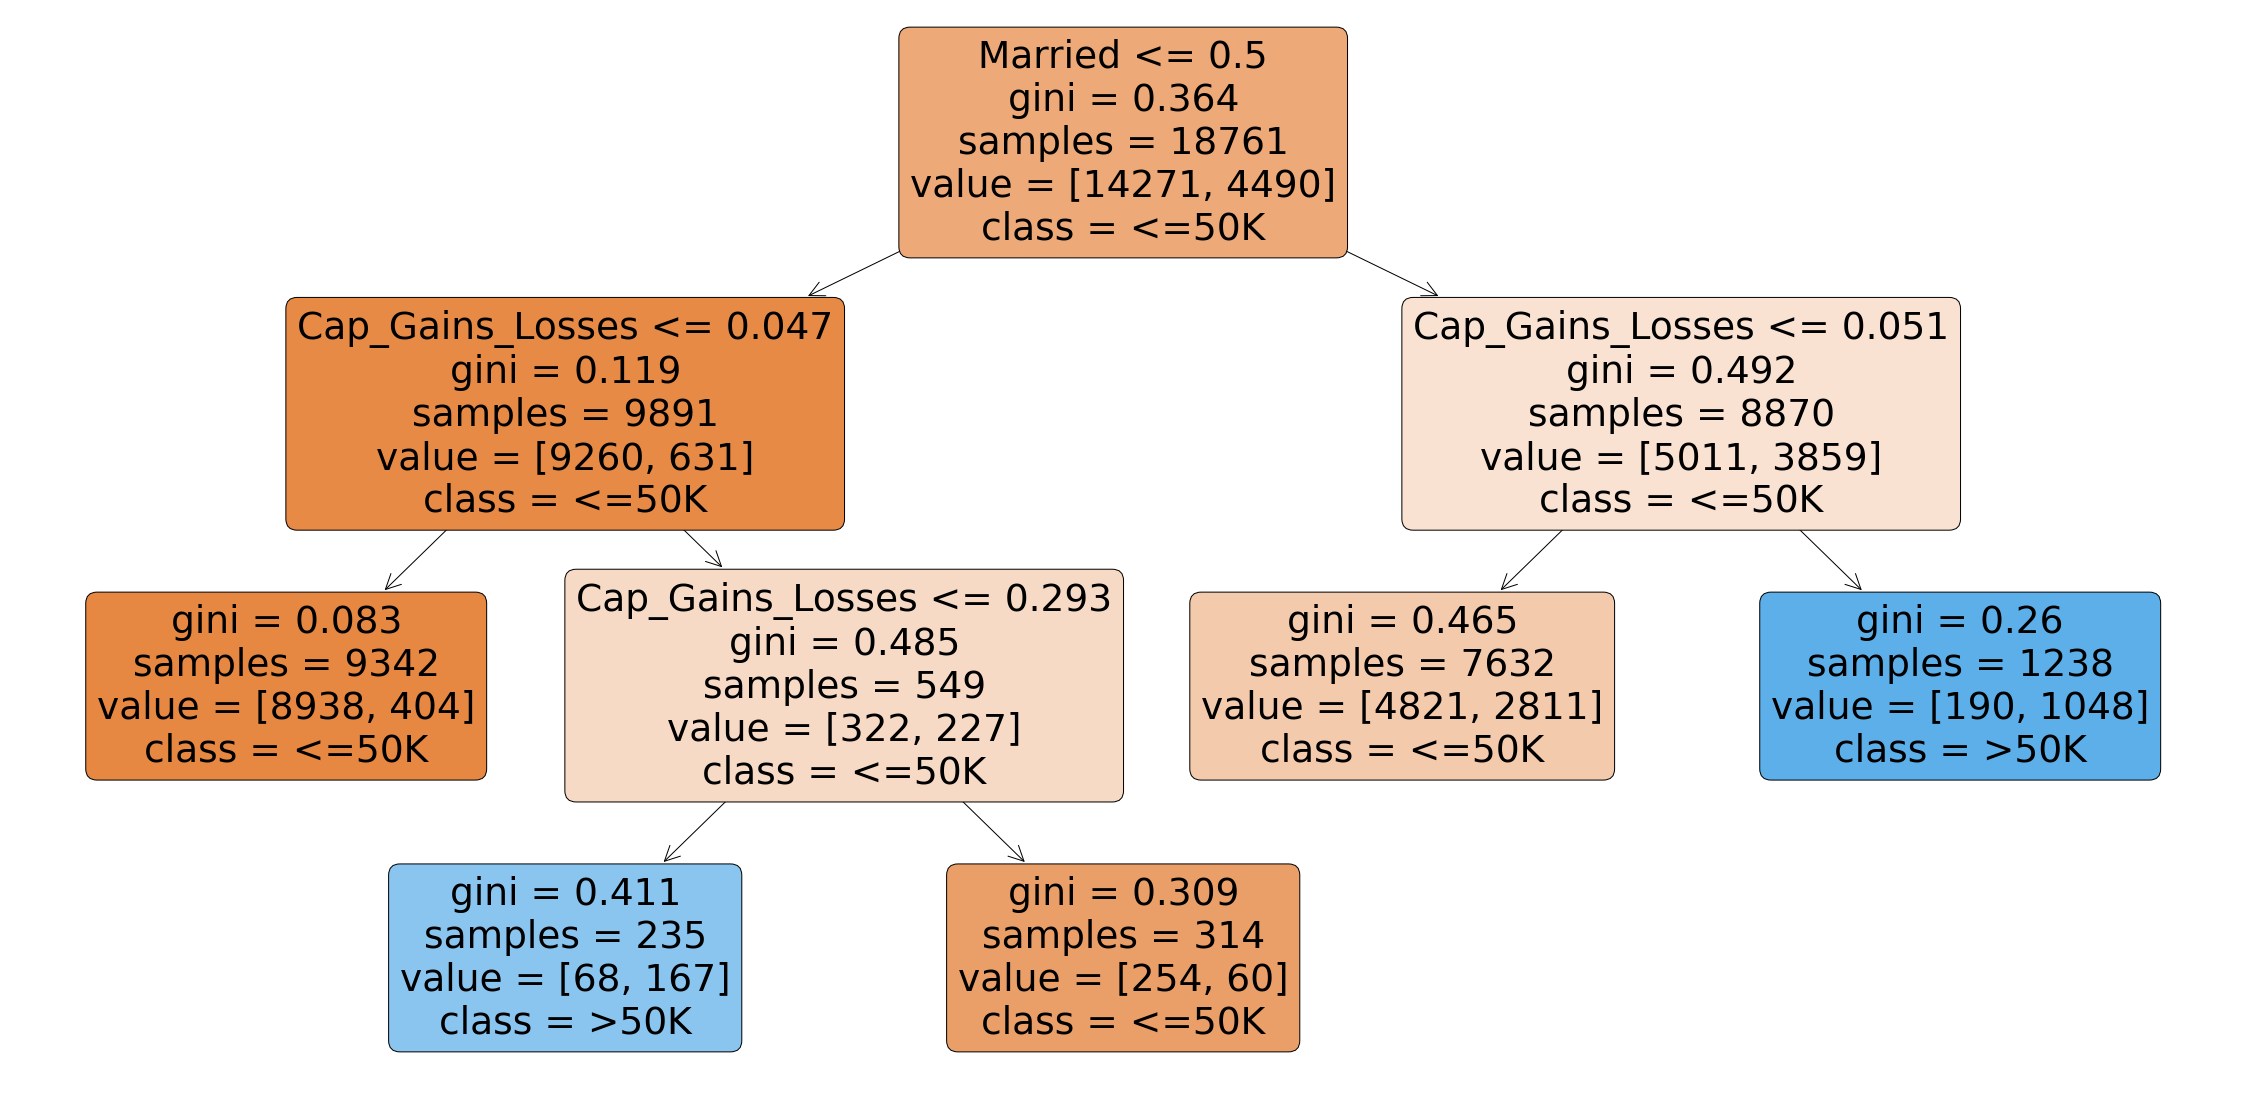

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))
plot_tree(DT,
          feature_names = X.columns,
          class_names=y['Income'].unique(),
          filled=True,
          rounded = True)

#### From the top: total sample is 18761; there are 9891 samples that are not married with income <=50k; there are 9342 samples that have Capital gain and losses <=0.047 and income <= 50k;  there are 235 samples that have capital gains and losses <= 0.293 and income <= 50k; there are 7632 samples that have capital gains and losses <= 0.051 and income <= 50k.

### 15. Develop a CART model using the test data set that utilizes the same target and predictor variables. Visualize the decision tree. Compare the decision trees. Does the test data result match the training data result?

In [54]:
adult_test = pd.read_csv("C:/Users/DDY\Desktop/2021-Spring-textbooks/ADS-502/Module2/Website Data Sets/adult_ch6_test")

In [56]:
y2 = adult_test[['Income']]

In [58]:
X2 = adult_test[['Marital status', 'Cap_Gains_Losses']]

In [60]:
marital_dummy_test = pd.get_dummies(X2['Marital status'])

In [62]:
X2 = pd.concat((X2[['Cap_Gains_Losses']], marital_dummy_test), axis = 1)

In [63]:
DT2 = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5).fit(X2, y2)

[Text(1116.0, 951.3000000000001, 'Married <= 0.5\ngini = 0.365\nsamples = 6155\nvalue = [4674, 1481]\nclass = <=50K'),
 Text(558.0, 679.5, 'Cap_Gains_Losses <= 0.047\ngini = 0.116\nsamples = 3262\nvalue = [3060, 202]\nclass = <=50K'),
 Text(279.0, 407.70000000000005, 'gini = 0.079\nsamples = 3098\nvalue = [2971, 127]\nclass = <=50K'),
 Text(837.0, 407.70000000000005, 'Cap_Gains_Losses <= 0.293\ngini = 0.496\nsamples = 164\nvalue = [89, 75]\nclass = <=50K'),
 Text(558.0, 135.89999999999998, 'gini = 0.389\nsamples = 72\nvalue = [19, 53]\nclass = >50K'),
 Text(1116.0, 135.89999999999998, 'gini = 0.364\nsamples = 92\nvalue = [70, 22]\nclass = <=50K'),
 Text(1674.0, 679.5, 'Cap_Gains_Losses <= 0.051\ngini = 0.493\nsamples = 2893\nvalue = [1614, 1279]\nclass = <=50K'),
 Text(1395.0, 407.70000000000005, 'gini = 0.469\nsamples = 2506\nvalue = [1567, 939]\nclass = <=50K'),
 Text(1953.0, 407.70000000000005, 'gini = 0.213\nsamples = 387\nvalue = [47, 340]\nclass = >50K')]

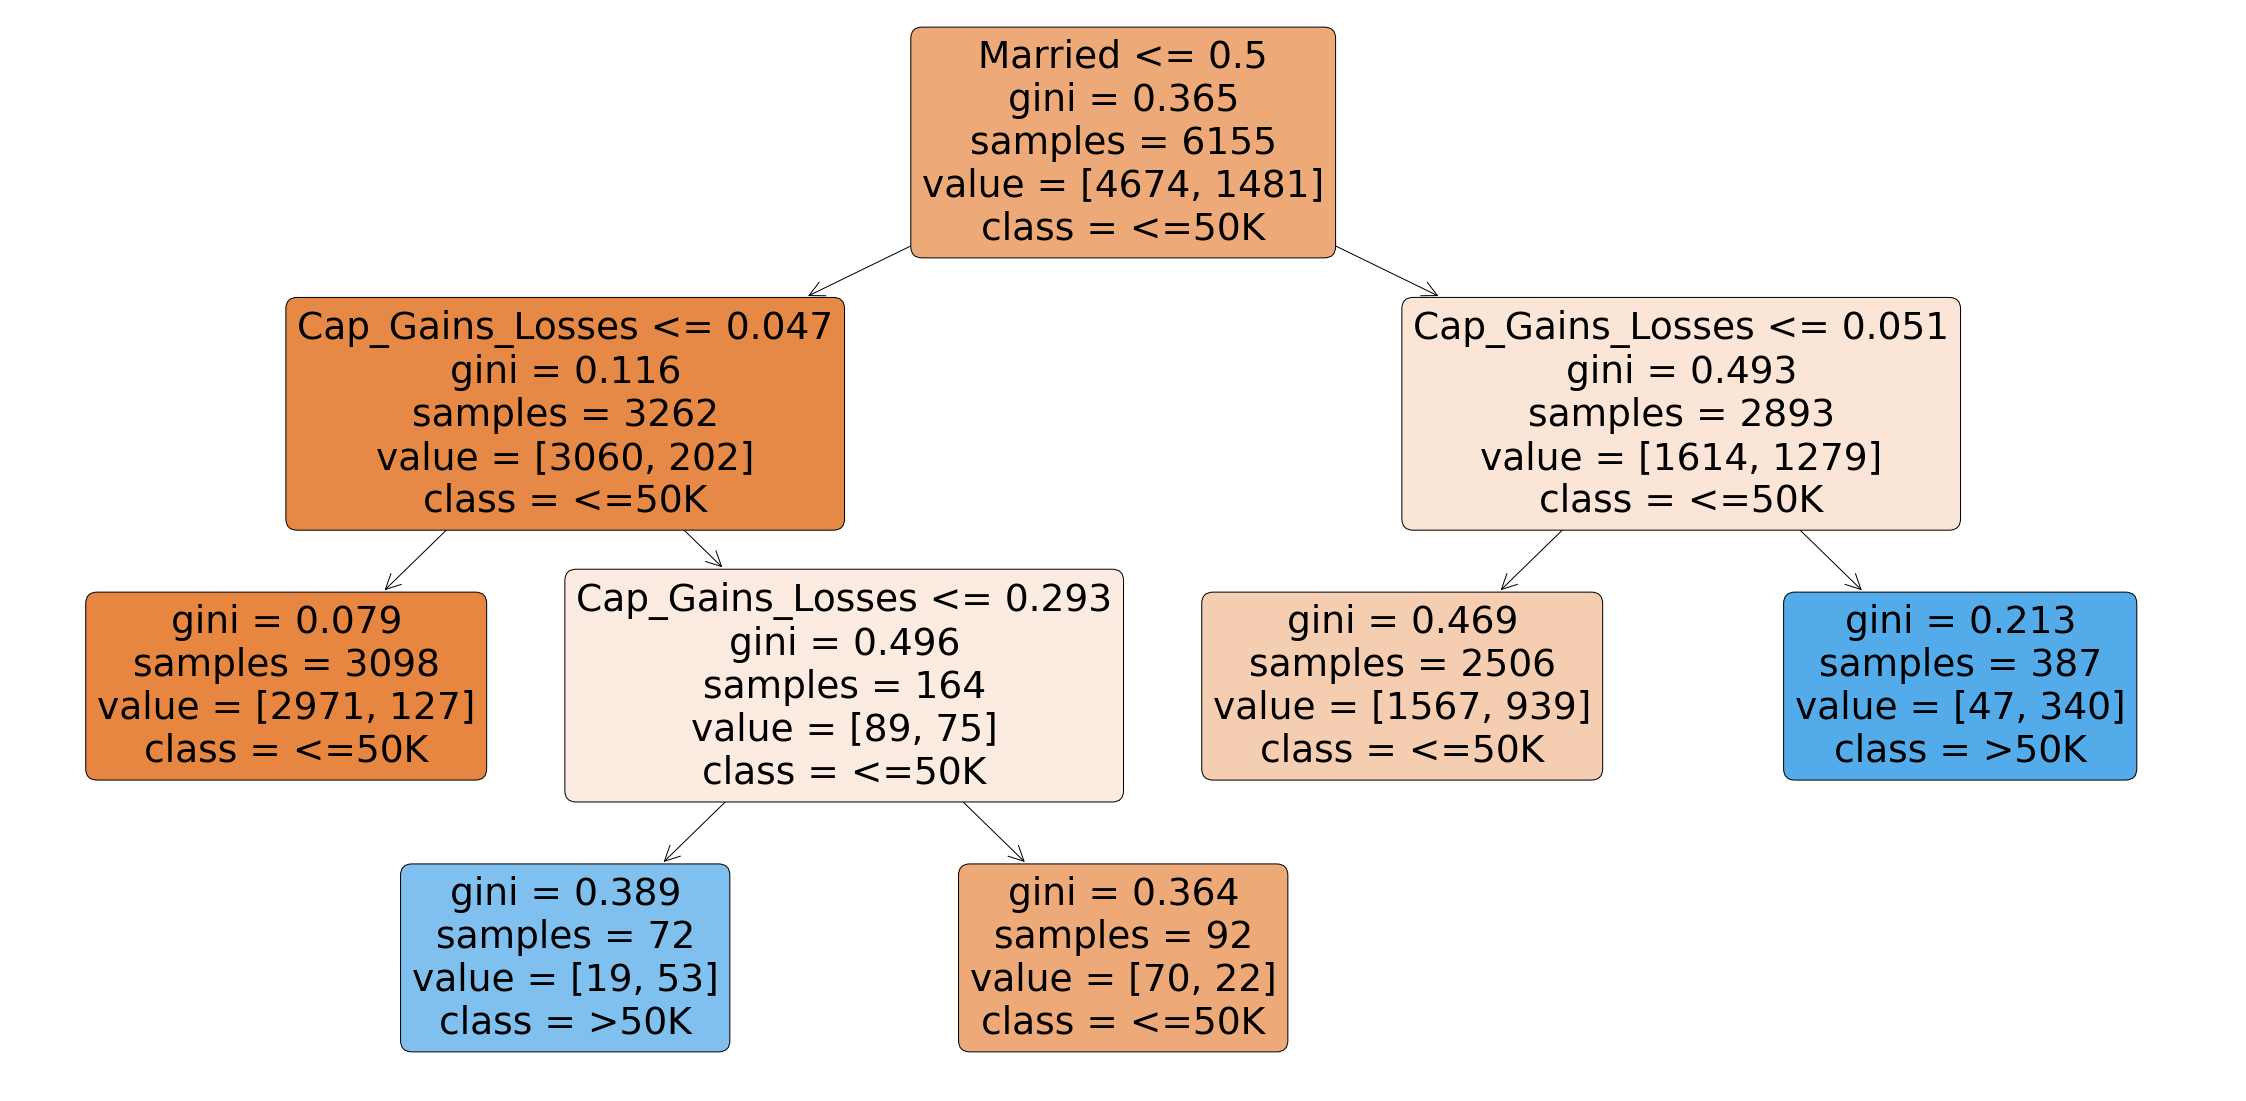

In [64]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))
plot_tree(DT2,
          feature_names = X2.columns,
          class_names=y2['Income'].unique(),
          filled=True,
          rounded = True)